<a href="https://colab.research.google.com/github/Sumitkumerdas/Related_work_ML_Group_7/blob/main/FruitVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import File
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sumitkumerdas","key":"6135448195b0be669ed901df6dfd7f5a"}'}

In [4]:
#Move kaggle.json to the right location
!mkdir -p ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle

In [6]:
!chmod 600 ~/.kaggle/kaggle.json #The chmod 600 sets proper permissions so Kaggle API accepts it.

In [7]:
#Install the Kaggle API
!pip install kaggle

In [8]:
!kaggle --version



Kaggle API 1.7.4.5


In [9]:
#Download a dataset from Kaggle
!kaggle datasets download -d sumitkumerdas/fresh-rotten-and-formalin-mixed-fruit-detection

Dataset URL: https://www.kaggle.com/datasets/sumitkumerdas/fresh-rotten-and-formalin-mixed-fruit-detection
License(s): unknown
 99% 845M/856M [00:12<00:00, 246MB/s]
100% 856M/856M [00:12<00:00, 73.9MB/s]


In [10]:
#Unzip the dataset
!unzip fresh-rotten-and-formalin-mixed-fruit-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63704.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63705.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63706.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63707.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63708.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63709.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63710.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63711.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63712.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63713.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63714.jpg  
  inflating: Fruits Original-ML-GRP-07/Grape/Fresh/msg5170347760-63715.jpg  
  inflating: Fruits Origi

In [11]:
#Check the files in your working directory
import os
os.listdir()

['.config',
 'drive',
 'kaggle.json',
 'Fruits Original-ML-GRP-07',
 'fresh-rotten-and-formalin-mixed-fruit-detection.zip',
 'sample_data']

In [12]:
#This will list all files inside that folder.
import os
os.listdir("Fruits Original-ML-GRP-07")

['Apple', 'Mango', 'desktop.ini', 'Grape', 'Banana', 'Orange']

In [14]:
#Image Classification
import tensorflow as tf

data_dir = "Fruits Original-ML-GRP-07"

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(128, 128),  # resize all images
    batch_size=32           # number of images per batch
)

class_names = dataset.class_names
print("Classes:", class_names)


Found 10153 files belonging to 5 classes.
Classes: ['Apple', 'Banana', 'Grape', 'Mango', 'Orange']


In [15]:
#Load and prepare dataset
import tensorflow as tf

# Path to your dataset folder
data_dir = "Fruits Original-ML-GRP-07"

# Load dataset from folders (80% training, 20% validation)
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,                # ensures reproducibility
    image_size=(128, 128),   # resize all images
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Show class names
class_names = train_ds.class_names
print("Detected Classes:", class_names)


# Normalize pixel values (0-255 → 0-1)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

Found 10153 files belonging to 5 classes.
Using 8123 files for training.
Found 10153 files belonging to 5 classes.
Using 2030 files for validation.
Detected Classes: ['Apple', 'Banana', 'Grape', 'Mango', 'Orange']


In [16]:
#Build a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


Epoch 1/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 222s 868ms/step - accuracy: 0.7155 - loss: 1.1002 - val_accuracy: 0.9315 - val_loss: 0.1832
Epoch 2/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 255s 844ms/step - accuracy: 0.9496 - loss: 0.1456 - val_accuracy: 0.9562 - val_loss: 0.1346
Epoch 3/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 277s 903ms/step - accuracy: 0.9706 - loss: 0.0882 - val_accuracy: 0.9655 - val_loss: 0.0914
Epoch 4/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 214s 840ms/step - accuracy: 0.9787 - loss: 0.0597 - val_accuracy: 0.9823 - val_loss: 0.0657
Epoch 5/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 230s 903ms/step - accuracy: 0.9852 - loss: 0.0422 - val_accuracy: 0.9724 - val_loss: 0.0972


In [19]:
#Evaluate the model
loss, acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {acc*100:.2f}%")

64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 560ms/step - accuracy: 0.2181 - loss: 1.6117
Validation Accuracy: 19.90%


Epoch 1/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 229s 898ms/step - accuracy: 0.9776 - loss: 0.0678 - val_accuracy: 0.9749 - val_loss: 0.0811
Epoch 2/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 231s 907ms/step - accuracy: 0.9945 - loss: 0.0193 - val_accuracy: 0.9808 - val_loss: 0.0749
Epoch 3/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 227s 894ms/step - accuracy: 0.9964 - loss: 0.0143 - val_accuracy: 0.9719 - val_loss: 0.0860
Epoch 4/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 209s 821ms/step - accuracy: 0.9928 - loss: 0.0202 - val_accuracy: 0.9601 - val_loss: 0.1873
Epoch 5/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 217s 852ms/step - accuracy: 0.9912 - loss: 0.0242 - val_accuracy: 0.9847 - val_loss: 0.0579


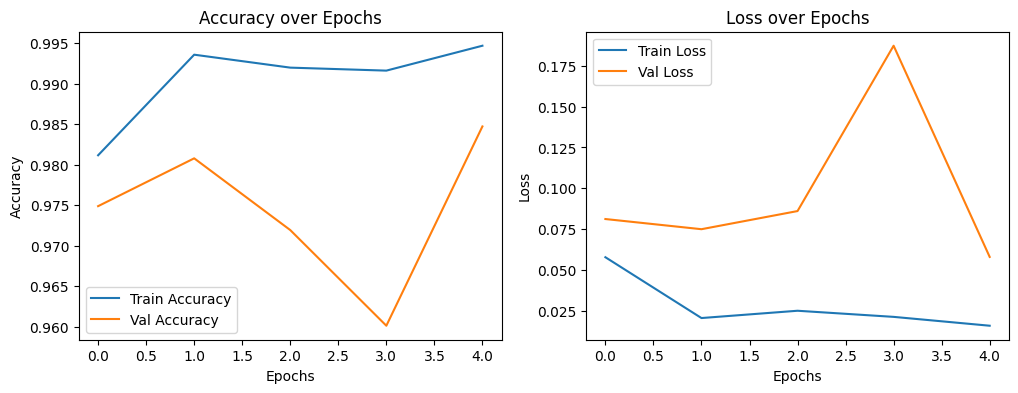

In [ ]:
# Train with history tracking
import matplotlib.pyplot as plt

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

# Plot accuracy & loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted Class: Orange (23.53% confidence)


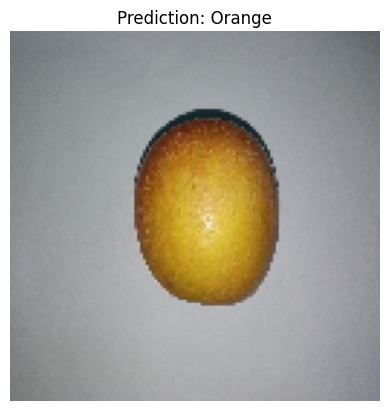

In [20]:
#Test on a single image
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Path to any image in your dataset
img_path = "Fruits Original-ML-GRP-07/Apple/Fresh/msg5170347760-66142.jpg"  # change to your file

# Load & preprocess image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # batch dimension
img_array = img_array / 255.0  # normalize

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
confidence = np.max(predictions) * 100

print(f"Predicted Class: {predicted_class} ({confidence:.2f}% confidence)")

# Show image
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()

In [21]:
import os
os.listdir("Fruits Original-ML-GRP-07/Apple")

['desktop.ini', 'Fresh', 'Rotten', 'Formalin-mixed']

In [22]:
import os
os.listdir("Fruits Original-ML-GRP-07/Apple/Fresh")

['msg5170347760-66142.jpg',
 'msg5170347760-64622.jpg',
 'msg5170347760-66277.jpg',
 'msg5170347760-68624.jpg',
 'IMG-20240612-WA0028.jpg',
 'IMG-20240612-WA0037.jpg',
 'msg5170347760-69531.jpg',
 'msg5170347760-65648.jpg',
 'msg5170347760-68616.jpg',
 'msg5170347760-66151.jpg',
 'msg5170347760-69612.jpg',
 'msg5170347760-68614.jpg',
 'msg5170347760-69656.jpg',
 'msg5170347760-65707.jpg',
 'WhatsApp Image 2024-06-22 at 10.44.26 PM.jpeg',
 'msg5170347760-69511.jpg',
 'msg5170347760-65745.jpg',
 'IMG-20240612-WA0043.jpg',
 'msg5170347760-66132.jpg',
 'msg5170347760-66259.jpg',
 'msg5170347760-65714.jpg',
 'msg5170347760-65751.jpg',
 'msg5170347760-69507.jpg',
 'msg5170347760-65666.jpg',
 'msg5170347760-69587.jpg',
 'msg5170347760-69596.jpg',
 'msg5170347760-65729.jpg',
 'WhatsApp Image 2024-06-21 at 11.09.41 PM.jpeg',
 'IMG-20240612-WA0111.jpg',
 'IMG-20240612-WA0109.jpg',
 'WhatsApp Image 2024-06-22 at 10.44.21 PM.jpeg',
 'msg5170347760-63159.jpg',
 'msg5170347760-66126.jpg',
 'WhatsApp

In [23]:
#Install and Import Dependencies
!pip install torch torchvision lightly --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 862.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.3/859.3 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [24]:
#Prepare Dataset (Unlabeled for Pretraining)
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# Data augmentations for SimCLR
simclr_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=128),
    transforms.RandomHorizontalFlip(),
    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor()
])

# Custom function to check if a file is a valid image and not in .ipynb_checkpoints
def is_valid_image_file(path):
    valid_extensions = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')
    return os.path.isfile(path) and path.lower().endswith(valid_extensions) and '.ipynb_checkpoints' not in path

# Load dataset without labels, using the custom check
dataset_unlabeled = datasets.ImageFolder(root="Fruits Original-ML-GRP-07", transform=simclr_transform, is_valid_file=is_valid_image_file)
dataloader_unlabeled = DataLoader(dataset_unlabeled, batch_size=64, shuffle=True, num_workers=2)

print(f"Found {len(dataset_unlabeled)} unlabeled images.")

Found 10153 unlabeled images.


In [31]:
import os
import shutil

# Path to the .ipynb_checkpoints directory
checkpoints_dir = "Fruits Original-ML-GRP-07/.ipynb_checkpoints"

# Check if the directory exists before attempting to remove it
if os.path.exists(checkpoints_dir):
    shutil.rmtree(checkpoints_dir)
    print(f"Removed directory: {checkpoints_dir}")
else:
    print(f"Directory not found: {checkpoints_dir}")

Directory not found: Fruits Original-ML-GRP-07/.ipynb_checkpoints


In [36]:
#Define SimCLR Model
import torch
import torch.nn as nn
from lightly.models.modules import SimCLRProjectionHead
import torchvision.models as models # Import torchvision models

# Backbone (ResNet-18)
resnet = models.resnet18(pretrained=True) # Load pre-trained ResNet-18
backbone = nn.Sequential(*list(resnet.children())[:-1])  # remove classifier

# Projection head
# The input features to the projection head will be 512 for ResNet-18
projection_head = SimCLRProjectionHead(512, 512, 128)

# Full SimCLR model
class SimCLR(nn.Module):
    def __init__(self, backbone, projection_head):
        super().__init__()
        self.backbone = backbone
        self.projection_head = projection_head

    def forward(self, x):
        h = self.backbone(x).flatten(start_dim=1)
        z = self.projection_head(h)
        return z

model = SimCLR(backbone, projection_head)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 146MB/s]


In [29]:
import lightly.models.utils as lightly_utils
print(dir(lightly_utils))

['CrossMapLRN2d', 'Dict', 'GroupNorm', 'Identity', 'Iterable', 'LayerNorm', 'List', 'LocalResponseNorm', 'Module', 'Optional', 'Parameter', 'Sequential', 'StochasticDepth', 'TYPE_CHECKING', 'Tensor', 'Tuple', 'Type', 'Union', '_NORM_LAYERS', '_NormBase', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_mask_reduce', '_mask_reduce_batched', '_no_grad_trunc_normal', 'activate_requires_grad', 'add_stochastic_depth_to_blocks', 'annotations', 'apply_masks', 'batch_shuffle', 'batch_shuffle_distributed', 'batch_unshuffle', 'batch_unshuffle_distributed', 'concat_all_gather', 'deactivate_requires_grad', 'dependency', 'dist', 'expand_index_like', 'functional', 'get_1d_sine_cosine_positional_embedding_from_positions', 'get_2d_sincos_pos_embed', 'get_2d_sine_cosine_positional_embedding', 'get_2d_sine_cosine_positional_embedding_from_grid', 'get_at_index', 'get_named_leaf_modules', 'get_weight_decay_parameters', 'init', 'initialize_2d_sine_

In [37]:
#Loss & Optimizer
from lightly.loss import NTXentLoss

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

criterion = NTXentLoss(temperature=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [34]:
#Pretrain with SimCLR
for epoch in range(10):  # 10 epochs for testing
    total_loss = 0
    for (x, _) in dataloader_unlabeled:
        # SimCLR requires two augmented views
        x1, x2 = x, x  # here both are same; normally, generate two random transforms per image
        x1, x2 = x1.to(device), x2.to(device)

        z1, z2 = model(x1), model(x2)
        loss = criterion(z1, z2)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/10] - Loss: {total_loss/len(dataloader_unlabeled):.4f}")

Epoch [1/10] - Loss: 2.8931
Epoch [2/10] - Loss: 2.8868
Epoch [3/10] - Loss: 2.8840
Epoch [4/10] - Loss: 2.8817
Epoch [5/10] - Loss: 2.8806
Epoch [6/10] - Loss: 2.8794
Epoch [7/10] - Loss: 2.8789
Epoch [8/10] - Loss: 2.8785
Epoch [9/10] - Loss: 2.8781
Epoch [10/10] - Loss: 2.8779


In [39]:
#Fine-tuning for Classification
from torch.utils.data import random_split

# Data for classification (with labels)
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset_labeled = datasets.ImageFolder(root="Fruits Original-ML-GRP-07", transform=train_transform)

# Split into train/test sets (80/20)
train_size = int(0.8 * len(dataset_labeled))
test_size = len(dataset_labeled) - train_size
train_dataset, test_dataset = random_split(dataset_labeled, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Classifier head
num_classes = len(dataset_labeled.classes)
classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(512, num_classes)  # 512 from ResNet backbone
)

# Combine backbone + classifier
model_finetune = nn.Sequential(
    backbone,  # pretrained backbone from SimCLR
    nn.Flatten(),
    classifier
).to(device)

# Freeze backbone parameters
for param in backbone.parameters():
    param.requires_grad = False

# Loss & optimizer
criterion_cls = nn.CrossEntropyLoss()
optimizer_cls = torch.optim.Adam(classifier.parameters(), lr=1e-3)


In [40]:
#Training the Classifier
# Training loop
for epoch in range(5):
    model_finetune.train()
    running_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer_cls.zero_grad()
        outputs = model_finetune(images)
        loss = criterion_cls(outputs, labels)
        loss.backward()
        optimizer_cls.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/5], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")


Epoch [1/5], Loss: 0.2545, Train Acc: 92.59%
Epoch [2/5], Loss: 0.0874, Train Acc: 97.49%
Epoch [3/5], Loss: 0.0702, Train Acc: 97.71%
Epoch [4/5], Loss: 0.0582, Train Acc: 98.20%
Epoch [5/5], Loss: 0.0564, Train Acc: 98.20%


In [59]:
#Testing
model_finetune.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_finetune(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 99.56%


In [2]:
# ============================================================
# BYOL (from scratch, PyTorch) + Linear Evaluation on Fruits
# ============================================================

# 0) (Colab) Ensure deps (torch/torchvision are preinstalled on Colab)
# !pip install torch torchvision --quiet

import os, copy, math, random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models


In [3]:
# 1) Reproducibility + Device
seed = 123
random.seed(seed); torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

Device: cpu


In [4]:
# 2) Paths & Hyperparams
data_dir = "Fruits Original-ML-GRP-07"
image_size = 128
batch_size_pretrain = 64     # reduce if you see CUDA OOM
batch_size_finetune = 32
epochs_pretrain = 10         # increase for better representations
epochs_finetune = 5
m_ema = 0.996                # BYOL EMA momentum
proj_hidden = 1024           # MLP hidden
proj_out = 256               # projection / prediction dim
base_lr = 1e-3

In [5]:
# 3) BYOL Augmentations (TwoCropsTransform)
imagenet_mean = (0.485, 0.456, 0.406)
imagenet_std  = (0.229, 0.224, 0.225)

augmentation = transforms.Compose([
    transforms.RandomResizedCrop(image_size, scale=(0.2, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
    transforms.RandomGrayscale(p=0.2),
    transforms.GaussianBlur(kernel_size=9, sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std),
])

class TwoCropsTransform:
    """Create two differently augmented views of the same image."""
    def __init__(self, base_transform):
        self.base_transform = base_transform
    def __call__(self, x):
        return self.base_transform(x), self.base_transform(x)

# For fine-tuning (no heavy augs)
eval_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std),
])

In [6]:
# 4) Datasets & Loaders
# Pretraining dataset returns ((x1, x2), label) — label is ignored
pretrain_dataset = datasets.ImageFolder(root=data_dir, transform=TwoCropsTransform(augmentation))
pretrain_loader = DataLoader(
    pretrain_dataset,
    batch_size=batch_size_pretrain,
    shuffle=True,
    num_workers=2,
    pin_memory=True,
    drop_last=True,  # important for BN stability
)

# For linear eval (labeled)
full_supervised = datasets.ImageFolder(root=data_dir, transform=eval_transform)
num_classes = len(full_supervised.classes)
print("Detected classes:", full_supervised.classes)

# Split 80/20 for train/test
train_len = int(0.8 * len(full_supervised))
test_len = len(full_supervised) - train_len
sup_train, sup_test = random_split(full_supervised, [train_len, test_len])
train_loader = DataLoader(sup_train, batch_size=batch_size_finetune, shuffle=True, num_workers=2, pin_memory=True)
test_loader  = DataLoader(sup_test,  batch_size=batch_size_finetune, shuffle=False, num_workers=2, pin_memory=True)

Detected classes: ['Apple', 'Banana', 'Grape', 'Mango', 'Orange']


In [7]:
# 5) Backbone (ResNet18 without classifier)
def get_backbone():
    resnet = models.resnet18(weights=None)  # weights="IMAGENET1K_V1" is okay too if you want a warm-start
    backbone = nn.Sequential(*list(resnet.children())[:-1])  # to get (B, 512, 1, 1)
    feat_dim = 512
    return backbone, feat_dim

backbone_online, feat_dim = get_backbone()
backbone_target = copy.deepcopy(backbone_online)


In [8]:
# 6) BYOL MLP Heads
# -----------------------
class MLP(nn.Module):
    """2-layer MLP with BatchNorm, used for projector and predictor."""
    def __init__(self, in_dim, hidden_dim, out_dim, last_bn=True):
        super().__init__()
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.relu = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(hidden_dim, out_dim)
        self.last_bn = last_bn
        if last_bn:
            self.bn2 = nn.BatchNorm1d(out_dim, affine=False)  # projector's last BN (no affine) as in BYOL
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        if self.last_bn:
            x = self.bn2(x)
        return x

projector_online = MLP(feat_dim, proj_hidden, proj_out, last_bn=True)
predictor_online = MLP(proj_out, proj_hidden, proj_out, last_bn=False)  # predictor has no last BN
projector_target = copy.deepcopy(projector_online)

# Target network does not get gradients
for p in backbone_target.parameters():  p.requires_grad = False
for p in projector_target.parameters(): p.requires_grad = False

# Move to device
backbone_online.to(device)
projector_online.to(device)
predictor_online.to(device)
backbone_target.to(device)
projector_target.to(device)


MLP(
  (fc1): Linear(in_features=512, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
)

In [9]:
# 7) Helper functions (EMA update + BYOL loss)
@torch.no_grad()
def update_moving_average(m: float):
    """EMA update for target net parameters from online net parameters."""
    for online, target in zip(backbone_online.parameters(), backbone_target.parameters()):
        target.data = target.data * m + online.data * (1.0 - m)
    for online, target in zip(projector_online.parameters(), projector_target.parameters()):
        target.data = target.data * m + online.data * (1.0 - m)

def flatten_features(x):
    # x: (B, C, 1, 1) -> (B, C)
    return torch.flatten(x, 1)

def l2_normalize(x, dim=1, eps=1e-8):
    return x / (x.norm(p=2, dim=dim, keepdim=True) + eps)

def byol_loss_fn(p, z):
    """Negative cosine similarity between p (online prediction) and z (target projection, stop-grad)."""
    p = l2_normalize(p, dim=1)
    z = l2_normalize(z, dim=1)
    # cosine similarity -> mean over batch; BYOL uses 2 - 2 * cos, but minimizing -cos is equivalent up to a constant
    return 2 - 2 * (p * z).sum(dim=1).mean()

In [10]:
# 8) Optimizer
params = list(backbone_online.parameters()) + list(projector_online.parameters()) + list(predictor_online.parameters())
optimizer = torch.optim.Adam(params, lr=base_lr)


In [ ]:
# 9) BYOL Pretraining
backbone_online.train(); projector_online.train(); predictor_online.train()
backbone_target.eval();  projector_target.eval()

print("=== BYOL pretraining ===")
for epoch in range(1, epochs_pretrain + 1):
    running = 0.0
    for (x1, x2), _ in pretrain_loader:
        x1, x2 = x1.to(device, non_blocking=True), x2.to(device, non_blocking=True)

        # Online network: enc -> proj -> pred
        y1 = flatten_features(backbone_online(x1))
        z1 = projector_online(y1)
        p1 = predictor_online(z1)

        y2 = flatten_features(backbone_online(x2))
        z2 = projector_online(y2)
        p2 = predictor_online(z2)

        # Target network: enc -> proj (stop-grad)
        with torch.no_grad():
            y1_t = flatten_features(backbone_target(x1))
            z1_t = projector_target(y1_t)
            y2_t = flatten_features(backbone_target(x2))
            z2_t = projector_target(y2_t)

        loss = byol_loss_fn(p1, z2_t) + byol_loss_fn(p2, z1_t)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

        # EMA update for target network
        update_moving_average(m_ema)

        running += loss.item()

    print(f"Epoch [{epoch}/{epochs_pretrain}]  BYOL Loss: {running/len(pretrain_loader):.4f}")


=== BYOL pretraining ===
